In [1]:
from __future__ import print_function
import json
import matplotlib
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
json_data=open('../json.data/contest_v1.json')
data = json.load(json_data)
json_data.close()

json_rank=open('../json.data/ranklist.json')
rank = json.load(json_rank)
json_rank.close()

json_op=open('../json.data/contest_out_operators.json')
op = json.load(json_op)
json_op.close()

json_dt=open('../json.data/contest_out_datatypes.json')
dt = json.load(json_dt)
json_dt.close()

In [3]:
len(data)

8048

In [4]:
data[0]

{u'exec_time': u'31 ms',
 u'filename': u'1542501099.cpp',
 u'function_count': 1,
 u'function_details': [{u'cyclomatic_complexity': 18,
   u'end_line': 67,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1542501099.cpp',
   u'general_fan_out': 0,
   u'length': 35,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 18,
   u'parameters': [],
   u'start_line': 33,
   u'token_count': 222,
   u'top_nesting_level': 0}],
 u'library_count': 1,
 u'macro_count': 10,
 u'memory': u'300 KB',
 u'nloc': 28,
 u'problem': u'https://www.codeforces.com/contest/868/problem/B',
 u'solution': u'https://www.codeforces.com/contest/868/submission/45891140',
 u'token_count': 285,
 u'used_headers': 1,
 u'used_macros': 5,
 u'usertype': u'Candidate'}

In [5]:
print(type(rank),type(op), type(dt))
print(op[0])
print(dt[0])

<type 'dict'> <type 'list'> <type 'list'>
{u'operators': 10, u'boolean_operators': 10, u'binary_operators': 0, u'filename': u'1542501099.cpp'}
{u'typedef': 8, u'unsigned ll': 0, u'string': 0, u'long double': 0, u'int': 4, u'double': 0, u'scanf': 0, u'float': 0, u'cin': 2, u'long': 0, u'filename': u'1542501099.cpp', u'char': 0, u'unsigned long': 0, u'long long': 1, u'fast_io': 0, u'printf': 0, u'#pragma': 0, u'unisgned int': 0, u'#define': 2, u'cout': 1}


In [6]:
set1 = set([])
data_uniq = []
for x in data:
    if x['solution'] not in set1:
        set1.add(x['solution'])
        data_uniq.append(x)
data = data_uniq[:]
print(len(data))

7943


In [7]:
#Check for order of files in data and op are same or not
for i in range(len(data)):
    if not data[i]['filename']==op[i]['filename']:
        print(i,data[i]['filename'], op[i]['filename'])
        print('No')
        break

2 1542501110.cpp 1542501106.cpp
No


In [8]:
i = 0
file_order_op = {}
for x in op:
    file_order_op[x['filename']] = i
    i += 1
    
i = 0
file_order_dt = {}
for x in dt:
    file_order_dt[x['filename']] = i
    i += 1

In [9]:
op[file_order_op['1542501099.cpp']]['operators']

10

In [10]:
dt[file_order_dt['1542501099.cpp']]['int']

4

In [11]:
tph = []
prob_cat = ['A','B']
main_cat = ['Expert','Master','Newbie','Pupil','Specialist','Unrated,','Candidate','International']
fin_list_AB = []
prob_AB = {}
count_AB = 0
for x in data:
    if x['problem'][-1] in prob_cat:
        if x['token_count'] > 0 and x['usertype'] in main_cat:
            json_tmp=open('../contest/'+x['filename'].split('.')[0]+'.json')
            tmp = json.load(json_tmp)
            try:
                tph.append(rank[tmp['username']])
                try:
                    prob_AB[tmp['username']].append(x['filename'])
                except:
                    prob_AB[tmp['username']] = [x['filename']]
            except:
                pass
            json_tmp.close()
for x,w in prob_AB.items():
    if len(w)>2:
        print(x,w)
    if len(w)==2:
        count_AB += 1
print(count_AB)
print(prob_AB['Akikaze'])

dorijanlendvaj [u'1542559313.cpp', u'1542561560.cpp', u'1542587687.cpp', u'1542594442.cpp']
teitoku [u'1542574991.cpp', u'1542582482.cpp', u'1542583252.cpp']
dodo_xxy [u'1542532400.cpp', u'1542532404.cpp', u'1542581045.cpp']
claudy [u'1542533599.cpp', u'1542578518.cpp', u'1542593624.cpp']
WHzy [u'1542550700.cpp', u'1542550706.cpp', u'1542550722.cpp', u'1542588424.cpp']
vaib1311 [u'1542561464.cpp', u'1542572141.cpp', u'1542583130.cpp']
TianXiangChen [u'1542572145.cpp', u'1542572433.cpp', u'1542589009.cpp']
henuwhr [u'1542533587.cpp', u'1542574089.cpp', u'1542574117.cpp', u'1542579743.cpp']
nikitawani [u'1542559339.cpp', u'1542561362.cpp', u'1542579304.cpp']
yuawang [u'1542572935.cpp', u'1542576926.cpp', u'1542589058.cpp']
OJT [u'1542576232.cpp', u'1542579752.cpp', u'1542587505.cpp']
284220 [u'1542576158.cpp', u'1542576392.cpp', u'1542579628.cpp', u'1542593043.cpp']
demons_29 [u'1542571906.cpp', u'1542571931.cpp', u'1542589501.cpp']
SiuGinHung [u'1542572481.cpp', u'1542572538.cpp', u'154

In [12]:
up_1 = 0
up_2 = 0
down_1 = 0
down_2 = 0
function_count = []
nloc = []
token_count = []
library_count = []
used_library = []
used_library_per = []
macro_count = []
used_macro = []
used_macro_per = []
usertype = []
mat_op = []
logical_op = []
bit_op = []
pragma = []
fastio = []
dt_order = ['unsigned ll', 'unisgned int', 'unsigned long', 'long long', 'long', 'int', 'long double', 'double', 'float', 'char', 'string']
dt_count_1 = [[] for i in range(len(dt_order))]
dt_count_2 = [[] for i in range(len(dt_order))]
# print(dt_count_1)
main_div1 = ['Expert','Master','Candidate','International']
main_div2 = ['Newbie','Pupil','Specialist']
prob_A = 0
prob_B = 0
count_AB = 0
user_rank = []
userdiv = []
time_A = []
time_B = []
cio = []
scpr = []
mp = 0
for x in data:
    if x['problem'][-1] in prob_cat:
        if x['token_count'] > 0 and x['usertype'] in main_cat:
            json_tmp=open('../contest/'+x['filename'].split('.')[0]+'.json')
            tmp = json.load(json_tmp)
            try:
                if len(prob_AB[tmp['username']])==2:
                    if rank[tmp['username']][1]==-1 or rank[tmp['username']][2]==-1:
                        mp+=1
                        continue
                    user_rank.append(rank[tmp['username']][0])
                    tA = rank[tmp['username']][1].split(':')
                    tA = int(tA[0])*60 + int(tA[1])
                    time_A.append(tA)
                    tB = rank[tmp['username']][2].split(':')
                    tB = int(tB[0])*60 + int(tB[1])
                    time_B.append(tB)
                    if int(user_rank[-1])<=200:
                        userdiv.append('Upper')
                        if (x['usertype'] in main_div1):
                            up_1 += 1
                        else:
                            up_2 += 1
                    else:
                        userdiv.append('Lower')
                        if (x['usertype'] in main_div1):
                            down_1 += 1
                        else:
                            down_2 += 1
                    function_count.append(x['function_count'])
                    nloc.append(x['nloc'])
                    token_count.append(x['token_count'])
                    macro_count.append(x['macro_count'])
                    used_macro.append(x['used_macros'])
                    library_count.append(x['library_count'])
                    used_library.append(x['used_headers'])
                    used_macro_per.append(0 if x['macro_count']==0 else (x['used_macros']/x['macro_count'])*100)
                    used_library_per.append(100 if x['library_count']==0 else (x['used_headers']/x['library_count'])*100)
                    usertype.append(x['usertype'])
                    mat_op.append(op[file_order_op[x['filename']]]['operators'])
                    logical_op.append(op[file_order_op[x['filename']]]['boolean_operators'])
                    bit_op.append(op[file_order_op[x['filename']]]['binary_operators'])
                    pragma.append(dt[file_order_dt[x['filename']]]['#pragma'])
                    fastio.append(dt[file_order_dt[x['filename']]]['fast_io'])
                    scpr.append((dt[file_order_dt[x['filename']]]['scanf'],dt[file_order_dt[x['filename']]]['printf']))
                    cio.append((dt[file_order_dt[x['filename']]]['cin'],dt[file_order_dt[x['filename']]]['cout']))
                    for i in range(len(dt_order)):
                        if userdiv[-1]=='Upper':
        #                     print(dt_count_1[i])
                            dt_count_1[i].append(dt[file_order_dt[x['filename']]][dt_order[i]])
        #                     print(dt[file_order_dt[x['filename']]])
        #                     print(dt_order[i])
                        else:
                            dt_count_2[i].append(dt[file_order_dt[x['filename']]][dt_order[i]])
                    if x['problem'][-1]=='A':
                        prob_A += 1
                    else:
                        prob_B += 1
            except Exception as e:
                pass
            json_tmp.close()
print(len(user_rank))
print(prob_A,prob_B)
# print(dt_count_1[0])
# print(time_A)

1700
850 850


In [13]:
function_count

[1,
 2,
 4,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 6,
 3,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 1,
 3,
 1,
 2,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 6,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 5,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 14,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 10,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 4,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 23,
 1,
 1,
 1,
 2,
 2,
 

In [14]:
X_cluster = np.vstack((function_count,nloc,token_count,library_count,used_library,used_library_per,macro_count,used_macro,
                      used_macro_per,mat_op,logical_op,bit_op,pragma,fastio))
print(X_cluster)
y_cluster = np.array(userdiv)
print(y_cluster)

[[  1   2   4 ...   1   1   1]
 [ 70  35  72 ...  35  23  26]
 [490 444 680 ... 178 136 186]
 ...
 [  0   1   7 ...   2   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
['Lower' 'Lower' 'Lower' ... 'Lower' 'Lower' 'Upper']


In [15]:
print('Upper',userdiv.count('Upper'))
print('1',up_1,'2',up_2)
print('Lower',userdiv.count('Lower'))
print('1',down_1,'2',down_2)

Upper 184
1 174 2 10
Lower 1516
1 678 2 838


In [16]:
def plot_data_1D(a,title='title'):
    plt.hlines(1,1,np.max(a)+np.max(a)*0.5)
    plt.xlim(0,np.max(a)+1)
    plt.ylim(0.5,1.5)
    y = np.ones(np.shape(a))
    plt.plot(a,y,'|',ms = 40)
    plt.title(title)

In [17]:
def plotdata_frequency(data,title='title'):
    plt.hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left')
    plt.title(title)

In [18]:
def stat_display(data):
    stat_data = stats.describe(data)
    print ('min : ' , stat_data.minmax[0])
    print ('max : ' , stat_data.minmax[1])
    print ('mean : ' , stat_data.mean)
    print ('variance : ' , stat_data.variance)
    print ('skewness : ' , stat_data.skewness)
    print ('kurtosis : ' , stat_data.kurtosis)

In [19]:
def find_max_json(arr):
    return data[np.argmax(arr)]

In [20]:
def find_min_json(arr):
    return data[np.argmin(arr)]

In [21]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.figsize"]

[6.0, 4.0]


[20.0, 12.0]

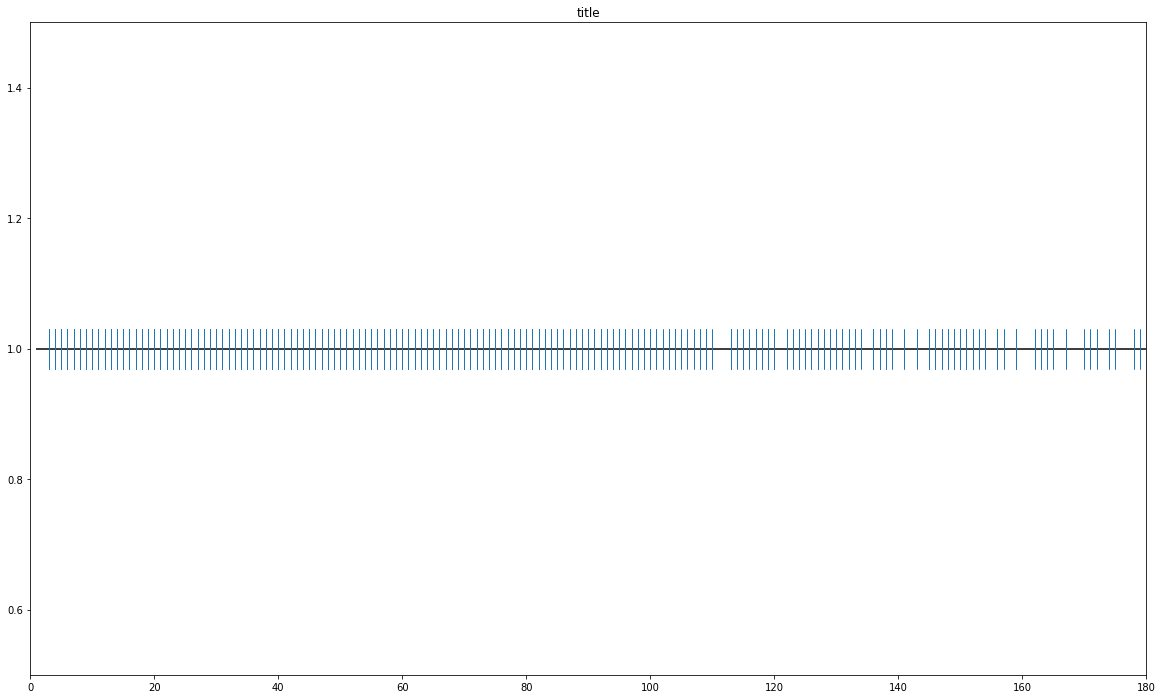

In [22]:
plot_data_1D(time_A+time_B)

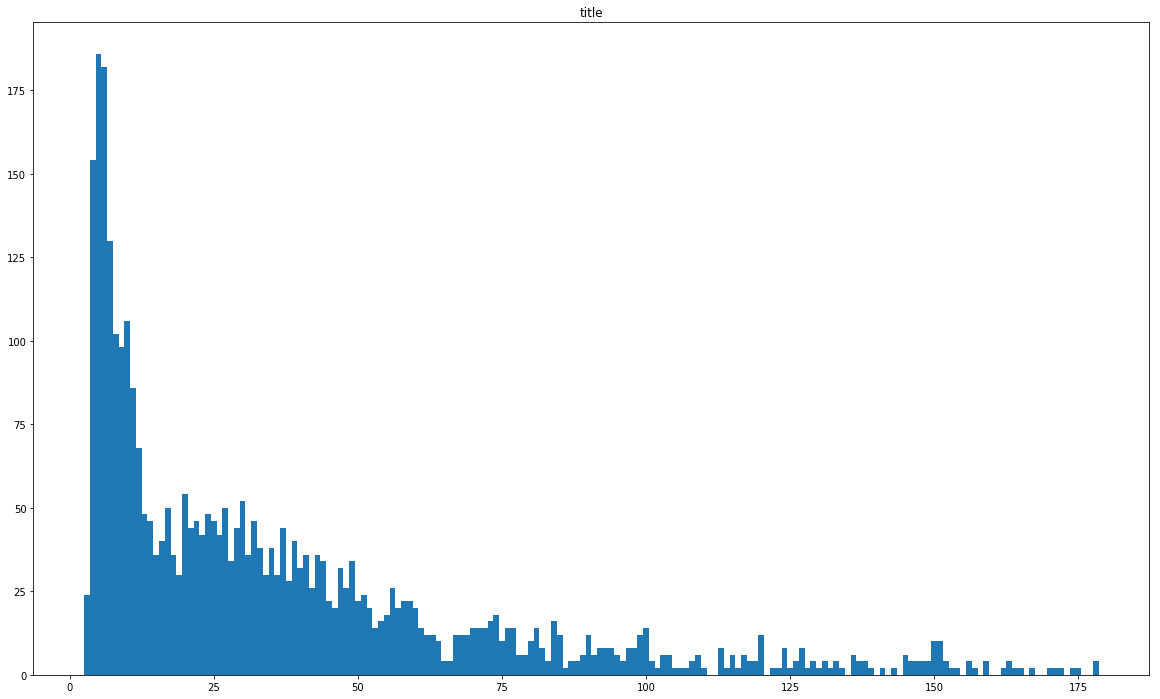

In [23]:
plotdata_frequency(time_A+time_B)

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
import pandas as pd

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H



In [25]:
X_cluster_df = pd.DataFrame(data=X_cluster.T)
hopkins(X_cluster_df)

0.9795783399158583

In [26]:
X_cluster.T.shape

(1700, 14)

In [27]:
X_cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,70,490,1,1,100,1,1,100,33,7,0,0,0
1,2,35,444,5,3,0,1,0,0,20,6,1,0,0
2,4,72,680,13,3,0,1,0,0,70,4,7,0,0
3,2,40,400,1,1,100,0,0,0,11,12,0,0,0
4,1,35,321,1,1,100,0,0,0,10,10,11,0,0


In [28]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_cluster_df)
X_scaled_df = pd.DataFrame(data = X_scaled)
X_scaled_df.head()

/home/harshit/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/harshit/.local/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.208882,1.232765,0.739420,-0.529048,-0.175712,0.760565,-0.467572,-0.085545,2.870389,0.807036,0.715858,-0.511300,-0.140698,-0.364113
1,-0.021098,-0.113073,0.574011,0.173045,0.412302,-1.314813,-0.467572,-0.338023,-0.348385,0.196587,0.483703,-0.312214,-0.140698,-0.364113
2,0.354469,1.309670,1.422631,1.577232,0.412302,-1.314813,-0.467572,-0.338023,-0.348385,2.544469,0.019392,0.882303,-0.140698,-0.364113
3,-0.021098,0.079190,0.415794,-0.529048,-0.175712,0.760565,-0.605356,-0.338023,-0.348385,-0.226032,1.876635,-0.511300,-0.140698,-0.364113
4,-0.208882,-0.113073,0.131722,-0.529048,-0.175712,0.760565,-0.605356,-0.338023,-0.348385,-0.272990,1.412325,1.678647,-0.140698,-0.364113


In [29]:
X_scaled_df.shape

(1700, 14)

In [30]:
hopkins(X_scaled_df)

0.9645822699294097

In [31]:
y_cluster_df = pd.DataFrame(data=y_cluster,columns=['Target'])
y_cluster_df.head()

,Target
0,Lower
1,Lower
2,Lower
3,Lower
4,Upper


In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,1.077133,-0.047560
1,0.066180,0.191923
2,2.660585,0.678565
3,-0.237665,1.060940
4,0.243278,1.305076


In [33]:
finalDf = pd.concat([principalDf, y_cluster_df], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Target
0,1.077133,-0.047560,Lower
1,0.066180,0.191923,Lower
2,2.660585,0.678565,Lower
3,-0.237665,1.060940,Lower
4,0.243278,1.305076,Upper


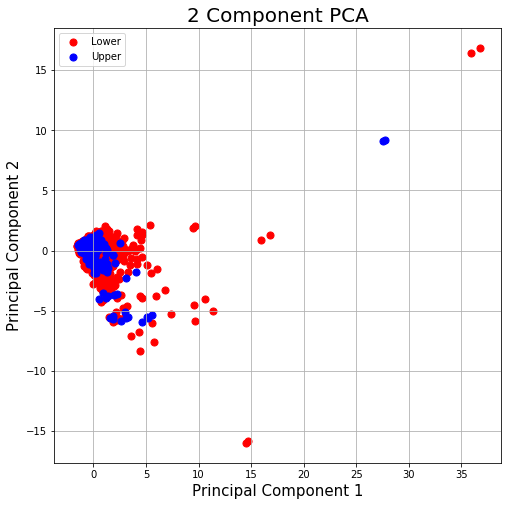

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Lower','Upper']
colors = ['r','b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [35]:
cluster_df = pd.concat([X_cluster_df, y_cluster_df], axis = 1)
cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Target
0,1,70,490,1,1,100,1,1,100,33,7,0,0,0,Lower
1,2,35,444,5,3,0,1,0,0,20,6,1,0,0,Lower
2,4,72,680,13,3,0,1,0,0,70,4,7,0,0,Lower
3,2,40,400,1,1,100,0,0,0,11,12,0,0,0,Lower
4,1,35,321,1,1,100,0,0,0,10,10,11,0,0,Upper


In [36]:
cluster_df.to_csv('out.csv',index=False)

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,max_iter=600)
kmeans.fit(X_scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
cl = []
c1_l = []
c0 = 0
c1 = 0

# print(X_scaled_df.head())
# X_scaled_df.iloc[[0]]

# predict_me = np.array(X_scaled_df.iloc[[0]].astype(float))
# # predict_me = predict_me.reshape(-1, len(predict_me))
# print(predict_me.shape)
# print(kmeans.predict(predict_me))

for i in range(len(X_scaled_df)):
    predict_me = np.array(X_scaled_df.iloc[[i]].astype(float))
    prediction = kmeans.predict(predict_me)
    if prediction == 0:
        c0 += 1
    else:
        c1_l.append(i)
        c1 += 1
    cl.append(prediction)
print(c0,c1)

1696 4


In [39]:
c1_l

[589, 762, 955, 1594]

In [40]:
for x in c1_l:
    print(X_cluster_df.iloc[[x]])

     0    1     2   3   4    5   6   7   8    9   10  11  12  13
589  83  485  5622   1   1  100   3   1   0  473  18  80   0   0
     0    1     2   3   4    5   6   7   8    9   10  11  12  13
762  83  493  5699   1   1  100   3   1   0  492  19  84   0   0
      0    1     2   3   4    5   6   7    8    9   10  11  12  13
955  108  365  4331   1   1  100  10  10  100  150   2  67   0   0
       0    1     2   3   4    5   6   7    8    9   10  11  12  13
1594  108  359  4292   1   1  100  10  10  100  142   4  67   0   0


In [41]:
features = "function_count,nloc,token_count,library_count,used_library,used_library_per,macro_count,used_macro,used_macro_per,mat_op,logical_op,bit_op,pragma,fastio"
features = features.split(',')
print(features)

['function_count', 'nloc', 'token_count', 'library_count', 'used_library', 'used_library_per', 'macro_count', 'used_macro', 'used_macro_per', 'mat_op', 'logical_op', 'bit_op', 'pragma', 'fastio']


In [42]:
Sum_of_squared_distances = []
K = range(1,150)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled_df)
    Sum_of_squared_distances.append(km.inertia_)

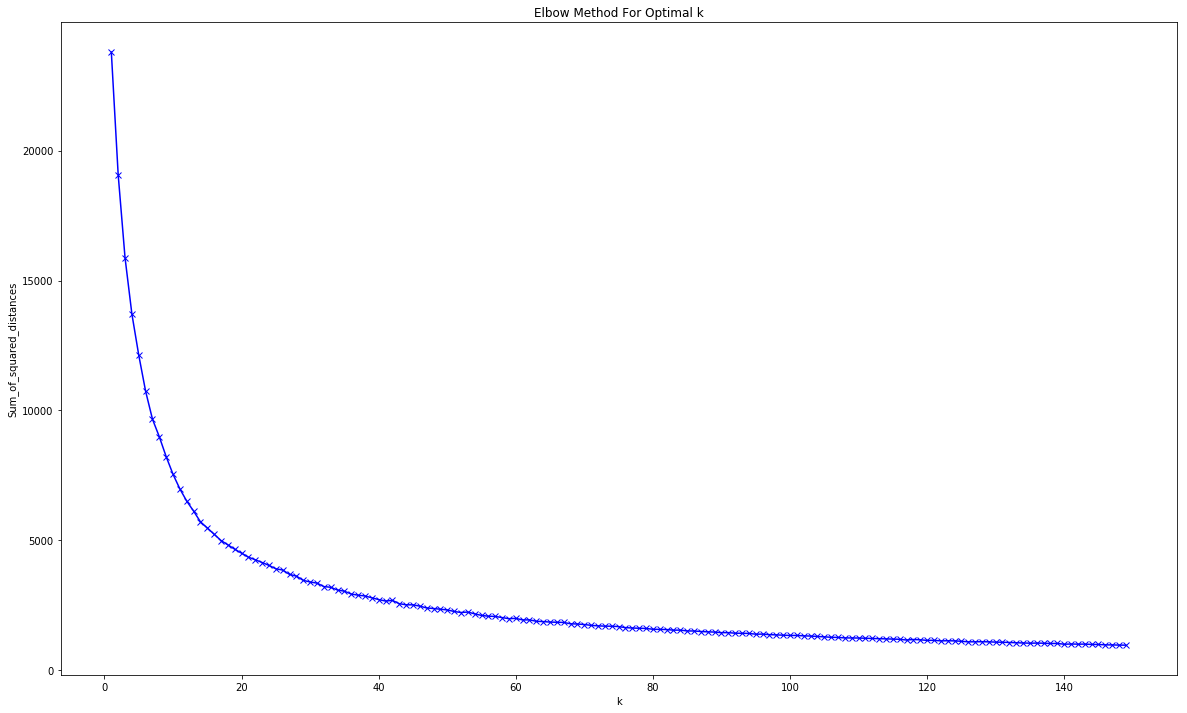

In [43]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
from pyclustertend import hopkins

hopkins(X_scaled_df, int(0.1*len(X_scaled_df)))

0.03674328909089485

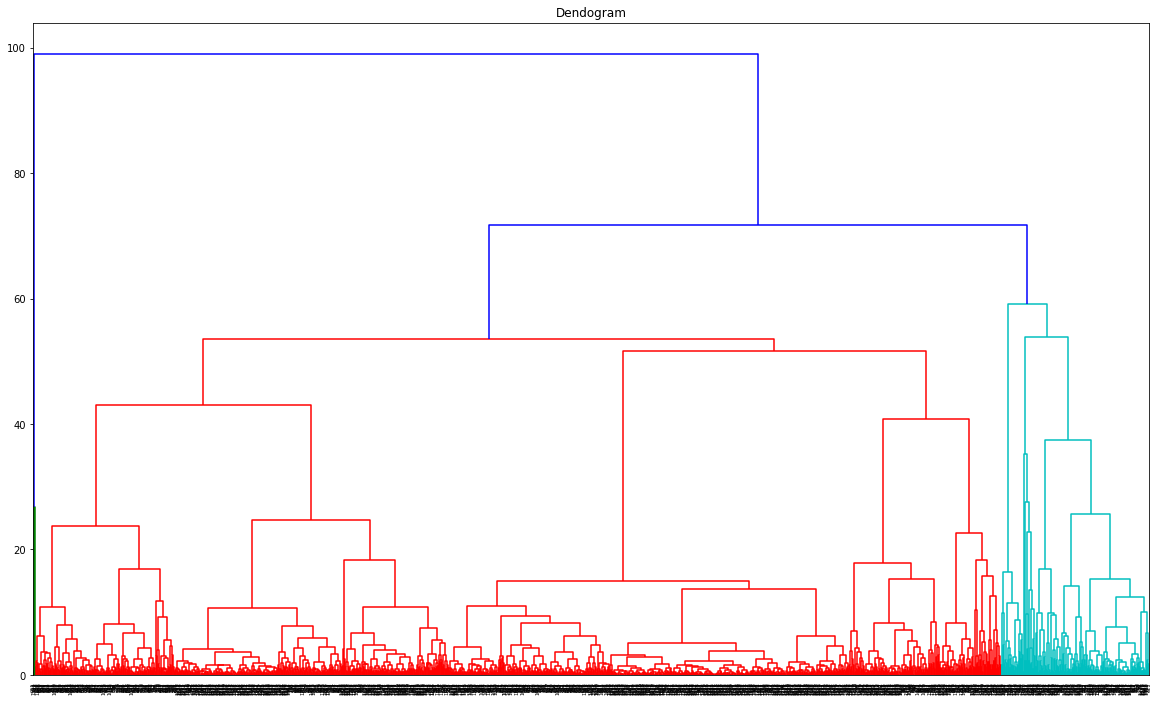

In [46]:
import scipy.cluster.hierarchy as shc

plt.figure()  
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(X_scaled_df, method='ward'))  

In [47]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
agg_pred = cluster.fit_predict(X_scaled_df)

In [48]:
y = np.bincount(agg_pred)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T

array([[   0, 1696],
       [   1,    4]])

In [49]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
print(dbscan)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)


In [50]:
dbscan.fit(X_scaled_df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [51]:
labeled_clusters = dbscan.labels_

In [52]:
np.max(labeled_clusters),np.min(labeled_clusters)

(8, -1)

In [53]:
unique_elements, counts_elements = np.unique(labeled_clusters, return_counts=True)
np.asarray((unique_elements,counts_elements))

array([[ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8],
       [911,  17, 504, 179,  17,   6,  14,  34,  15,   3]])

In [54]:
X_scaled_df.columns = features
X_scaled_df.head()

,function_count,nloc,token_count,library_count,used_library,used_library_per,macro_count,used_macro,used_macro_per,mat_op,logical_op,bit_op,pragma,fastio
0,-0.208882,1.232765,0.739420,-0.529048,-0.175712,0.760565,-0.467572,-0.085545,2.870389,0.807036,0.715858,-0.511300,-0.140698,-0.364113
1,-0.021098,-0.113073,0.574011,0.173045,0.412302,-1.314813,-0.467572,-0.338023,-0.348385,0.196587,0.483703,-0.312214,-0.140698,-0.364113
2,0.354469,1.309670,1.422631,1.577232,0.412302,-1.314813,-0.467572,-0.338023,-0.348385,2.544469,0.019392,0.882303,-0.140698,-0.364113
3,-0.021098,0.079190,0.415794,-0.529048,-0.175712,0.760565,-0.605356,-0.338023,-0.348385,-0.226032,1.876635,-0.511300,-0.140698,-0.364113
4,-0.208882,-0.113073,0.131722,-0.529048,-0.175712,0.760565,-0.605356,-0.338023,-0.348385,-0.272990,1.412325,1.678647,-0.140698,-0.364113


In [55]:
X_scaled_df.describe()

,function_count,nloc,token_count,library_count,used_library,used_library_per,macro_count,used_macro,used_macro_per,mat_op,logical_op,bit_op,pragma,fastio
count,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1700.000000,1.700000e+03,1700.000000,1.700000e+03,1.700000e+03,1.700000e+03,1700.000000,1.700000e+03,1.700000e+03,1.700000e+03
mean,-2.089832e-18,1.003119e-16,-1.671865e-17,8.359326e-17,0.000000,-6.269495e-18,0.000000,4.179663e-18,-3.866188e-17,-3.343731e-17,0.000000,-5.015596e-17,2.978010e-17,3.761697e-17
std,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294,1.000294e+00,1.000294,1.000294e+00,1.000294e+00,1.000294e+00,1.000294,1.000294e+00,1.000294e+00,1.000294e+00
min,-2.088818e-01,-1.035934e+00,-6.593641e-01,-7.045715e-01,-0.469719,-1.314813e+00,-0.605356,-3.380226e-01,-3.483849e-01,-6.486508e-01,-0.909230,-5.113000e-01,-1.406984e-01,-3.641130e-01
25%,-2.088818e-01,-4.591457e-01,-3.465254e-01,-5.290481e-01,-0.175712,-1.314813e+00,-0.605356,-3.380226e-01,-3.483849e-01,-3.669049e-01,-0.677075,-5.113000e-01,-1.406984e-01,-3.641130e-01
50%,-2.088818e-01,-1.899781e-01,-1.595414e-01,-5.290481e-01,-0.175712,7.605647e-01,-0.467572,-3.380226e-01,-3.483849e-01,-1.790744e-01,-0.444919,-3.122139e-01,-1.406984e-01,-3.641130e-01
75%,-2.109805e-02,1.945471e-01,9.576375e-02,1.730454e-01,-0.175712,7.605647e-01,0.359129,-8.554527e-02,-3.483849e-01,1.496292e-01,0.251547,2.850445e-01,-1.406984e-01,-3.641130e-01
max,1.988398e+01,1.749818e+01,1.947019e+01,9.651307e+00,16.582688,7.605647e-01,5.594901,1.077098e+01,2.870389e+00,2.236060e+01,10.234232,1.621193e+01,7.107401e+00,2.746400e+00


In [58]:
len(y_cluster_df)

1700

In [59]:
len(X_scaled_df)

1700

In [61]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

x_train, x_test, y_train, y_test = train_test_split(X_scaled_df, y_cluster_df, test_size=0.3, random_state=42)

In [62]:
dt = DecisionTreeClassifier()

In [63]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
y_pred = dt.predict(x_test)

In [65]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7803921568627451


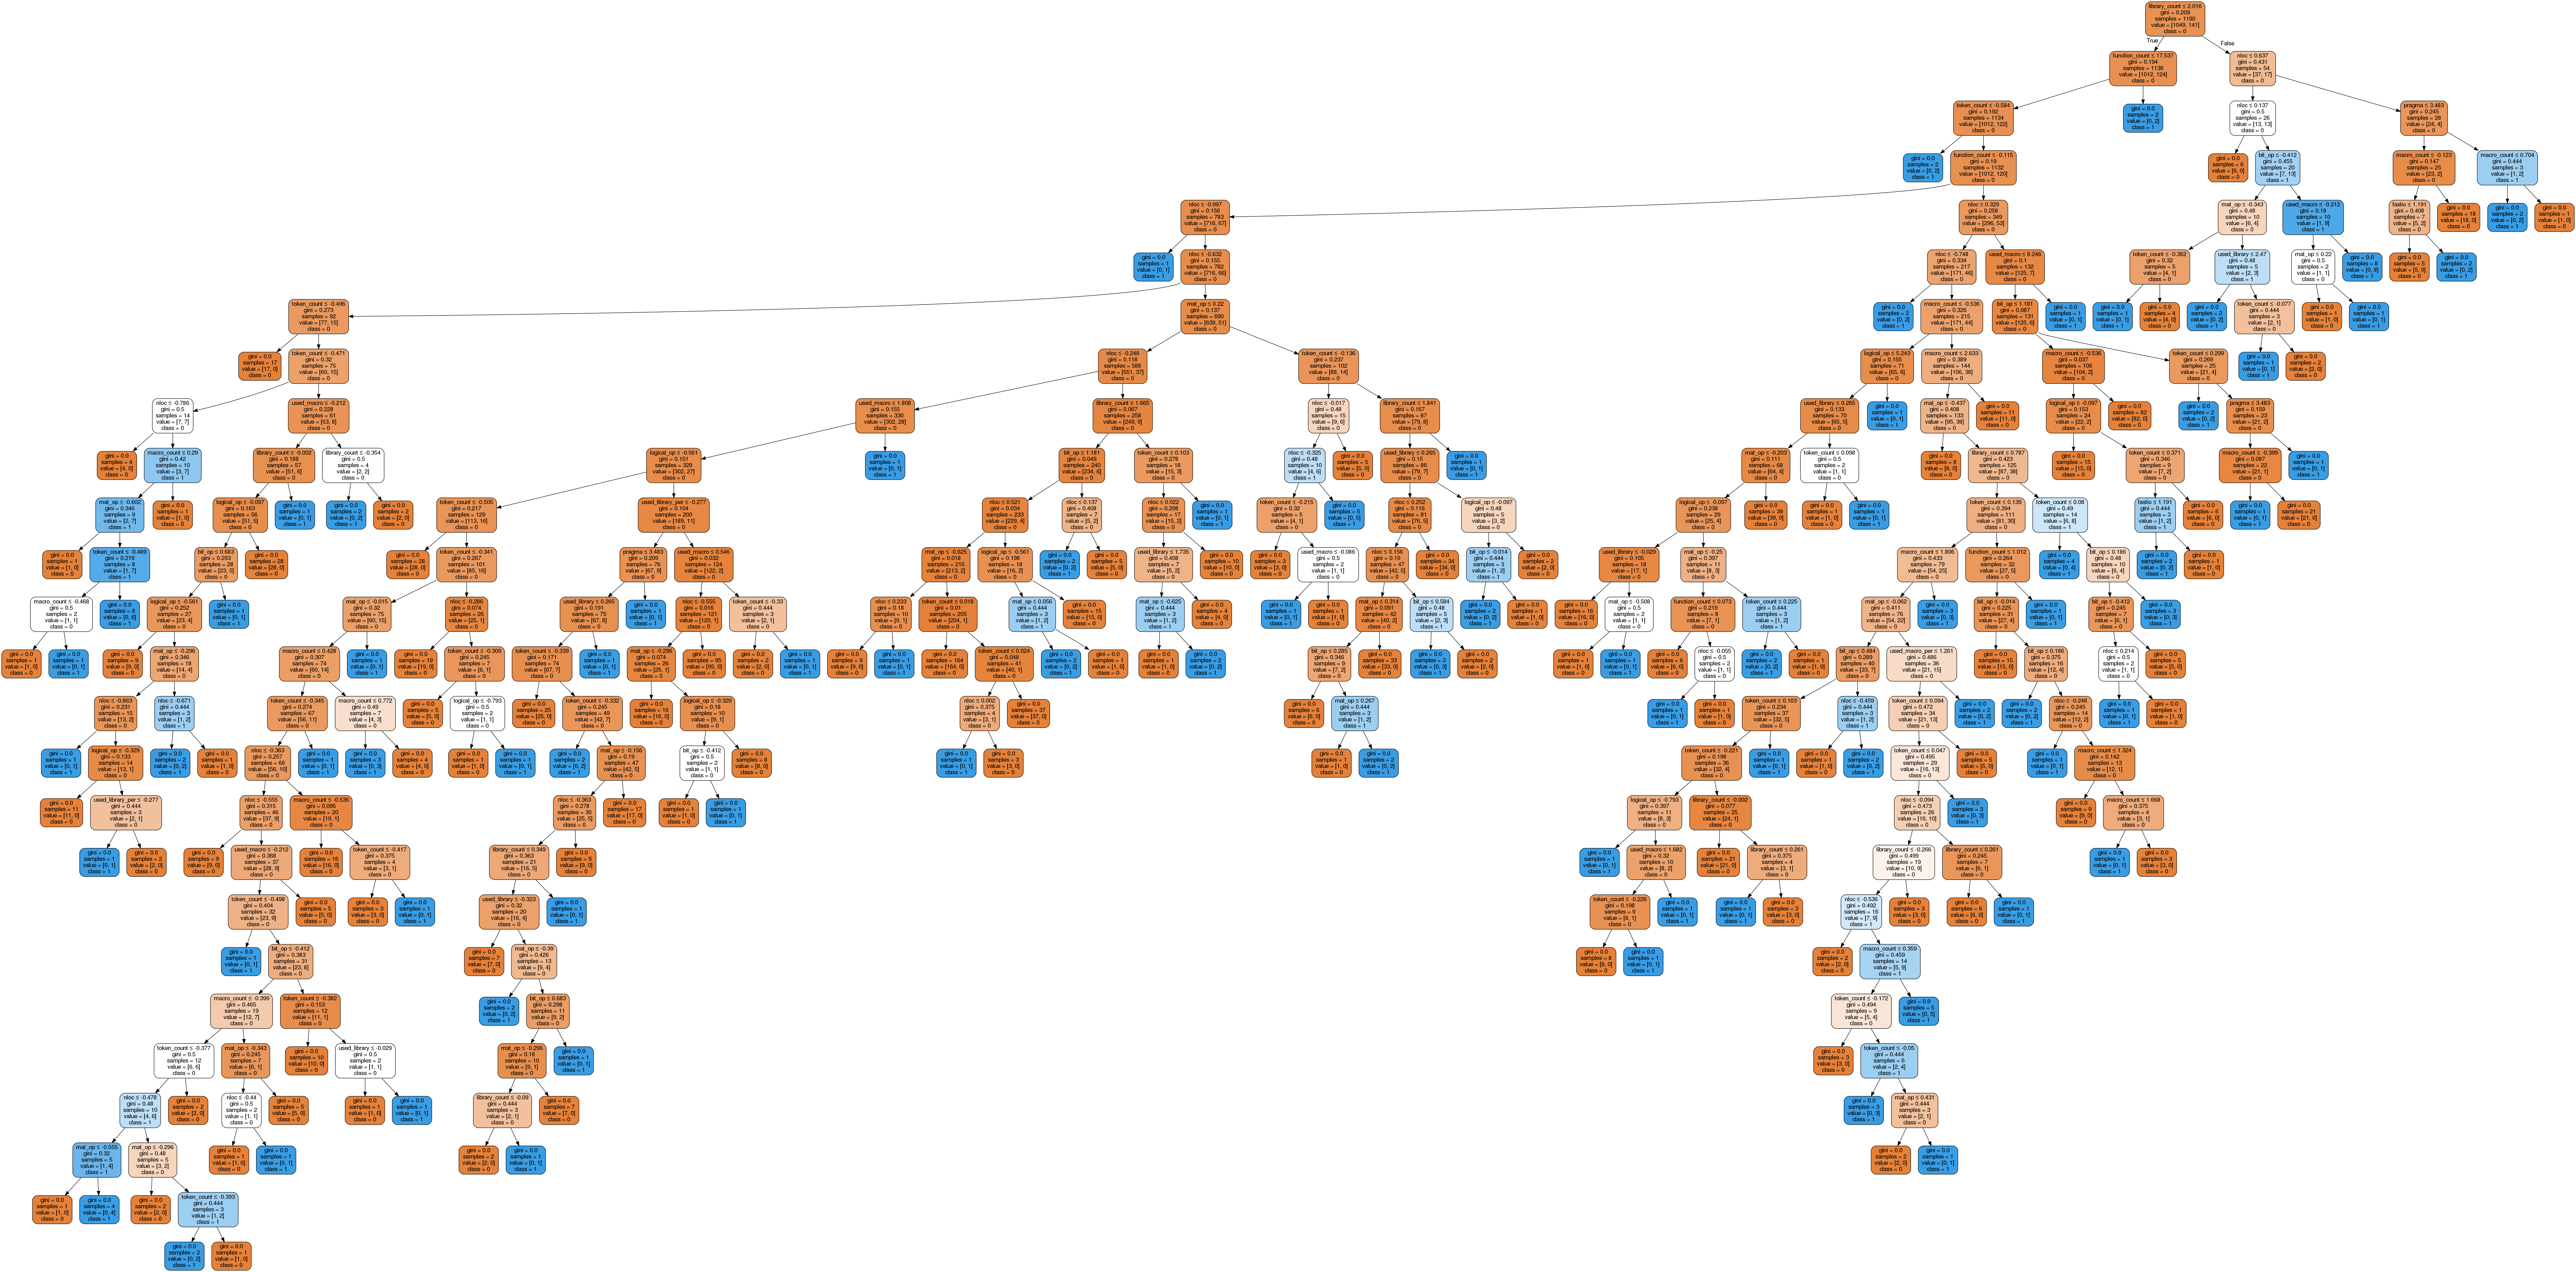

In [68]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_scaled_df.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('codes.png')
Image(graph.create_png())

In [71]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9137254901960784


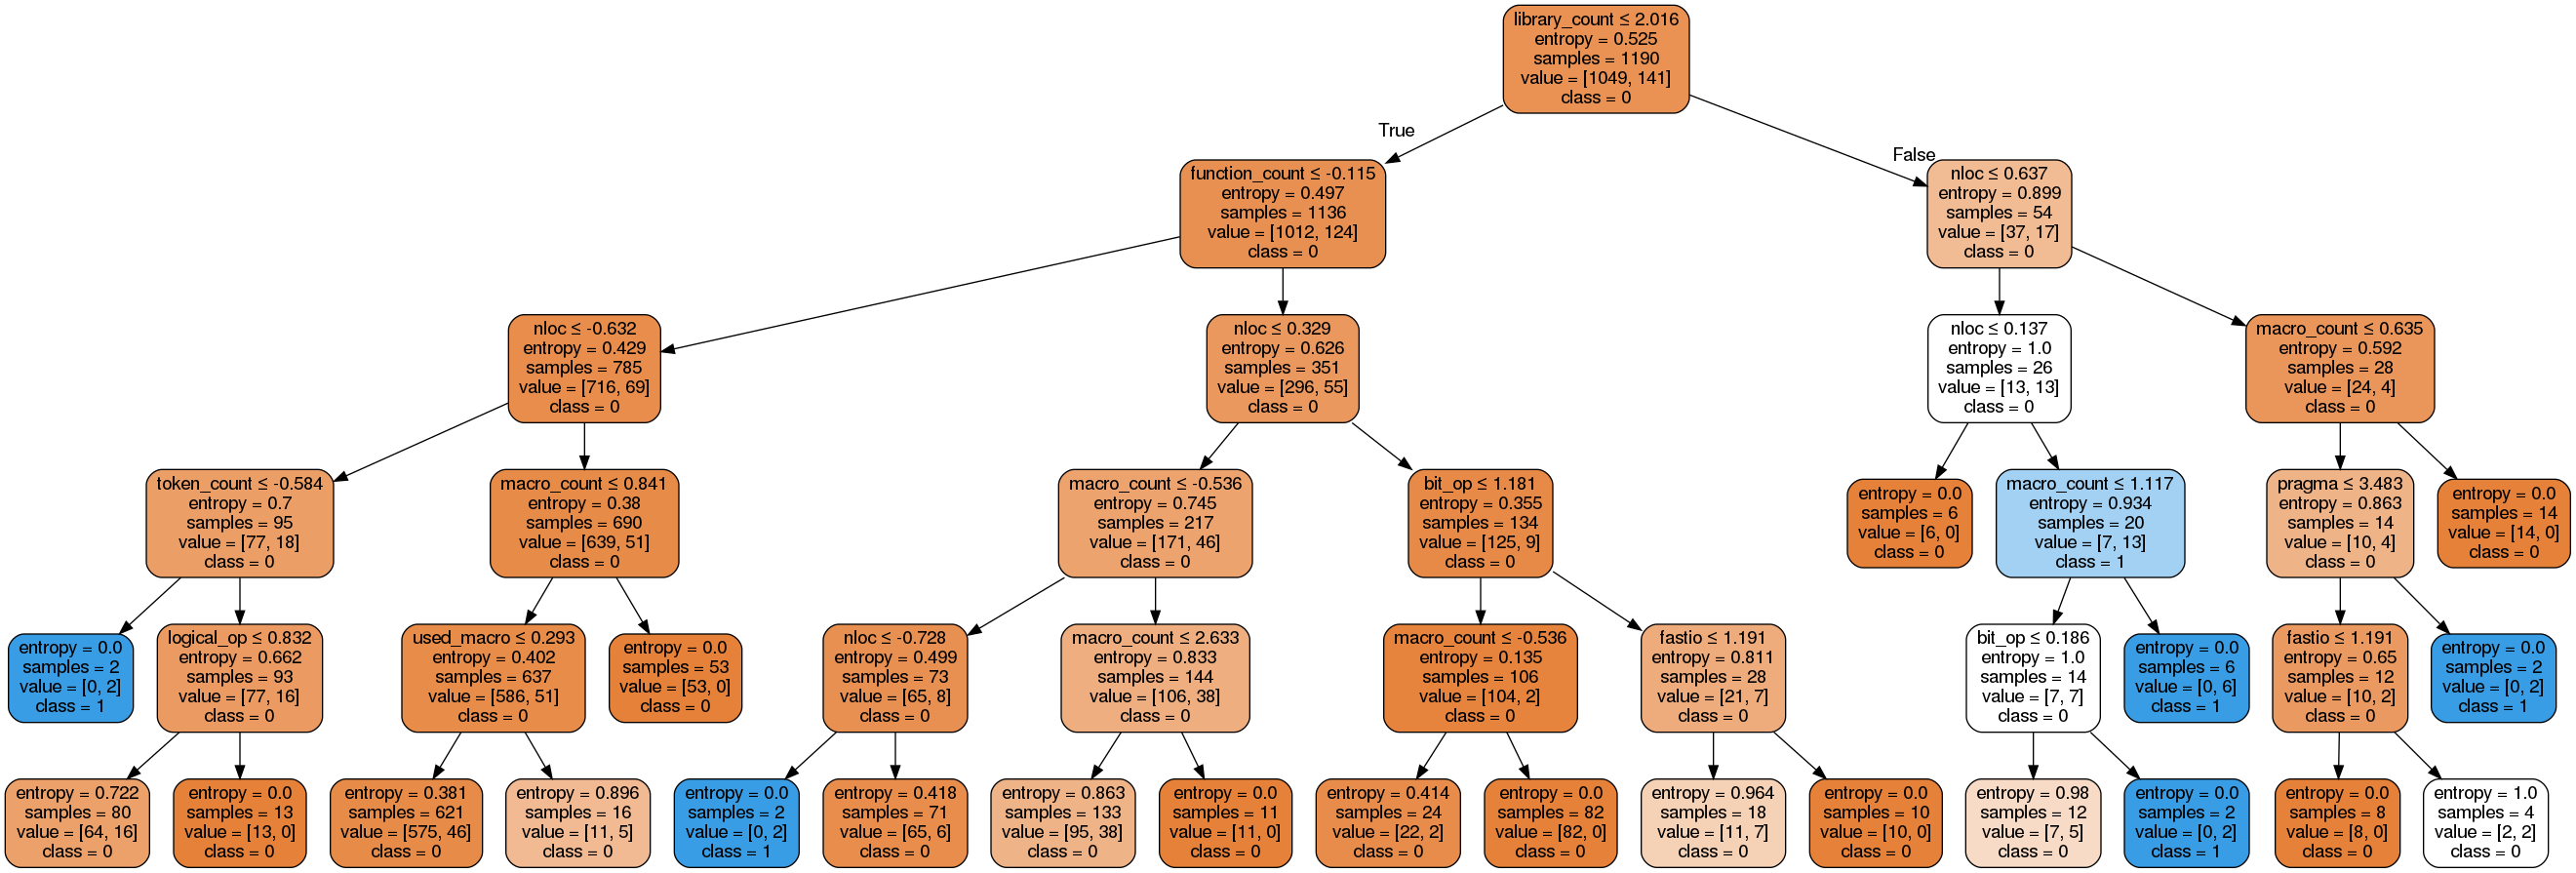

In [72]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_scaled_df.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('codes.png')
Image(graph.create_png())